<a href="https://colab.research.google.com/github/sid7shetty/Explainable_AI/blob/main/introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Step 1: Read the data into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Dataset/cardio_train.csv',sep=';')



In [ ]:
# Print the dimensions of the DataFrame
print("Dimensions of the DataFrame:", data.shape)

# Print column names
print("Column names:", data.columns)

Dimensions of the DataFrame: (70000, 13)
Column names: Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
# Select values of the 'age' column into an array
age_values = data['age'].values



In [ ]:
# Compute the year of the age values
year_of_age = (age_values // 365).astype(int)

In [ ]:
# Compute the mean of the age values
mean_age = np.mean(age_values)

In [ ]:
# Compute the maximum and minimum of the age values
max_age = np.max(age_values)
min_age = np.min(age_values)

In [ ]:
# Split data into training and test datasets (e.g., 80% train, 20% test)
X = data.drop(columns=['cardio'])  # Assuming 'cardio' is the target variable
y = data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Scale data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 1: Create a Logistic Regression model
model = LogisticRegression()

In [ ]:
# Step 2: Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Step 3: Predict the output on the test data
y_pred = model.predict(X_test_scaled)

In [ ]:
# Step 4: Compare the predicted output with the real values
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


In [ ]:
# Step 5: Print the importance of the features
feature_importance = np.abs(model.coef_[0])
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

Feature Importance:
id: 0.0025
age: 0.3671
gender: 0.0124
height: 0.0439
weight: 0.2185
ap_hi: 5.5555
ap_lo: 0.0580
cholesterol: 0.3557
gluc: 0.0616
smoke: 0.0402
alco: 0.0438
active: 0.0716


In [ ]:
# Step 6: Print all features and their values of one sample (proband)
sample_index = 0  # You can choose any index you want to examine
sample_features = X_test_scaled[sample_index]
print("\nFeatures and Values of a Sample (Proband):")
for feature, value in zip(X.columns, sample_features):
    print(f"{feature}: {value:.4f}")


Features and Values of a Sample (Proband):
id: 0.5803
age: 0.9335
gender: -0.7338
height: -1.0196
weight: -0.7095
ap_hi: 0.0759
ap_lo: -0.0860
cholesterol: 0.9329
gluc: -0.3946
smoke: -0.3121
alco: -0.2409
active: 0.4941


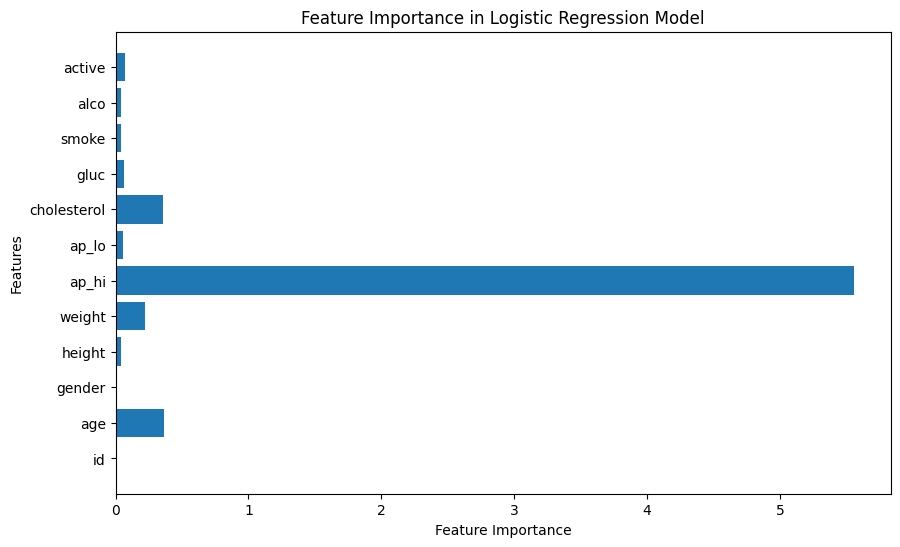

In [ ]:
# Step 7: Visualize feature importance in a bar chart
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()